# Chocolate Scraping with Beautiful Soup

After eating chocolate bars your whole life, you've decided to go on a quest to find the greatest chocolate bar in the world.

You've found a website that has over 1700 reviews of chocolate bars from all around the world. It's linked below the text for the first task.

The data is displayed in a table, instead of in a `csv` or `json`. Thankfully, we have the power of BeautifulSoup that will help us transform this webpage into a DataFrame that we can manipulate and analyze.

The rating scale is from 1-5, as described in <a href="http://flavorsofcacao.com/review_guide.html">this review guide</a>. A `1` is "unpleasant" chocolate, while a `5` is a bar that transcends "beyond the ordinary limits".

Some questions we thought about when we found this dataset were:
 - Where are the best cocao beans grown?
 - Which countries produce the highest-rated bars?
 - What's the relationship between cocao solids percentage and rating?
 
Can we find a way to answer these questions, or uncover more questions, using BeautifulSoup and Pandas?

## Make Some Chocolate Soup

1. Explore the webpage displayed in the browser. What elements could be useful to scrape here? Which elements do we _not_ want to scrape?

https://content.codecademy.com/courses/beautifulsoup/cacao/index.html

List of Tags to Include: table id = "cacaoTable"

List of Tags to Exclude: div id= "banner", div id = " infoContainer

2. Let's make a request to this stie to get the raw HTML, which we can later turn into a BeautifulSoup object.

   The URL is

```
https://content.codecademy.com/courses/beautifulsoup/cacao/index.html
```
   
   You can pass this into the `.get()` method of the `requests` module to get the HTML.

In [1]:
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

r = requests.get('https://content.codecademy.com/courses/beautifulsoup/cacao/index.html')

3. Create a BeautifulSoup object called `soup` to traverse this HTML.

   Use `"html.parser"` as the parser, and the content of the response you got from your request as the document.

In [2]:
soup = BeautifulSoup(r.content, "html.parser")

4. If you want, print out the `soup` object to explore the HTML.

   So many table rows! You're probably very relieved that we don't have to scrape this information by hand.

## How are ratings distributed?

5. How many terrible chocolate bars are out there? And how many earned a perfect 5? Let's make a histogram of this data.

   The first thing to do is to put all of the ratings into a list.
   
   Use a command on the `soup` object to get all of the tags that contain the ratings.

In [5]:
ratings_tags = soup.select(".Rating")

1796


6. Create an empty list called `ratings` to store all the ratings in.

In [6]:
ratings = []

7. Loop through the ratings tags and get the text contained in each one. Add it to the ratings list.

   As you do this, convert the rating to a float, so that the ratings list will be numerical. This should help with calculations later.

In [8]:
it = iter(ratings_tags)
next(it)
for rating in it:
    rating_text = float(rating.get_text())
    ratings.append(rating_text)


1795


8. Using Matplotlib, create a histogram of the ratings values:

```py
plt.hist(ratings)
```

   Remember to show the plot using `plt.show()`!

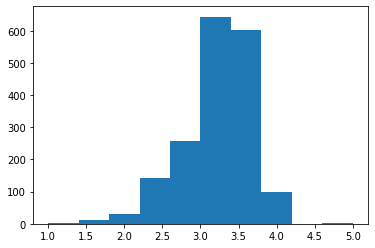

In [9]:
plt.hist(ratings)
plt.show()

## Which chocolatier makes the best chocolate?

9. We want to now find the 10 most highly rated chocolatiers. One way to do this is to make a DataFrame that has the chocolate companies in one column, and the ratings in another. Then, we can do a `groupby` to find the ones with the highest average rating.

   First, let's find all tags on the webpage that contain the company names.

In [10]:
companies = soup.select(".Company")

1796


10. Just like we did with ratings, we now want to make an empty list to hold company names.

In [11]:
company_names = []

11. Loop through the tags containing the company names, and add the text from each tag to the list you just created.

In [12]:
it2 = iter(companies)
next(it2)
for company in it2:
    company_names.append(company.get_text())

1795


12. Create a DataFrame with a column "Company" corresponding to your companies list, and a column "Ratings" corresponding to your ratings list.

In [23]:
df = pd.DataFrame({'Company':company_names, 'Ratings':ratings})
print(df)

       Company  Ratings
0     A. Morin     3.75
1     A. Morin     2.75
2     A. Morin     3.00
3     A. Morin     3.50
4     A. Morin     3.50
...        ...      ...
1790    Zotter     3.75
1791    Zotter     3.00
1792    Zotter     3.50
1793    Zotter     3.25
1794    Zotter     3.00

[1795 rows x 2 columns]


13. Use `.grouby` to group your DataFrame by Company and take the average of the grouped ratings.

    Then, use the `.nlargest` command to get the 10 highest rated chocolate companies. Print them out.
    
    Look at the hint if you get stuck on this step!

In [28]:
edited_df = df.groupby(['Company']).mean()
print(edited_df)

                         Ratings
Company                         
A. Morin                3.380435
AMMA                    3.500000
Acalli                  3.750000
Adi                     3.250000
Aequare (Gianduja)      2.875000
...                          ...
hello cocoa             3.125000
hexx                    3.050000
iQ Chocolate            2.875000
organicfair             2.850000
twenty-four blackbirds  3.041667

[416 rows x 1 columns]


In [29]:
final_df = edited_df.nlargest(10,['Ratings'])
print(final_df)

                                       Ratings
Company                                       
Tobago Estate (Pralus)                4.000000
Heirloom Cacao Preservation (Zokoko)  3.875000
Ocelot                                3.875000
Amedei                                3.846154
Matale                                3.812500
Patric                                3.791667
Idilio (Felchlin)                     3.775000
Acalli                                3.750000
Chocola'te                            3.750000
Christopher Morel (Felchlin)          3.750000


## Is more cacao better?

14. We want to see if the chocolate experts tend to rate chocolate bars with higher levels of cacoa to be better than those with lower levels of cacoa.

    It looks like the cocoa percentages are in the table under the Cocoa Percent column (note we are looking at cocoa not cocao!)
    
    Using the same methods you used in the last couple of tasks, create a list that contains all of the cocoa percentages. Store each percent as a float, after stripping off the `%` character.

In [37]:
cocoa_percent = soup.select('.CocoaPercent')

cocoa_percent_float = []

it3 = iter(cocoa_percent)
next(it3)

for percent in it3:
    cocoa_content = percent.get_text()
    cocoa_number = float(cocoa_content[:-1])
    cocoa_percent_float.append(cocoa_number)


15. Add the cocoa percentages as a column called `"CocoaPercentage"` in the DataFrame that has companies and ratings in it.

In [51]:
df["CocoaPercentage"] = cocoa_percent_float

16. Make a scatterplot of ratings (`your_df.Rating`) vs percentage of cocoa (`your_df.CocoaPercentage`).

    You can do this in Matplotlib with these commands:
    
```py
plt.scatter(df.CocoaPercentage, df.Rating)
plt.show()
```

Call `plt.clf()` to clear the figure between showing your histogram and this scatterplot.

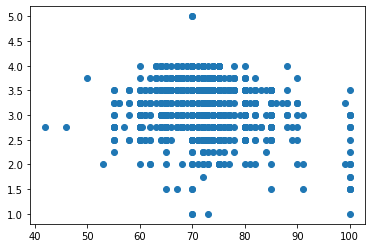

In [58]:
plt.clf()
plt.scatter(df.CocoaPercentage, df.Ratings)
plt.show()

17. Is there any correlation here? We can use some numpy commands to draw a line of best-fit over the scatterplot.

    Copy this code and paste it after you create the scatterplot, but before you call `.show()`:
    
```py
z = np.polyfit(df.CocoaPercentage, df.Rating, 1)
line_function = np.poly1d(z)
plt.plot(df.CocoaPercentage, line_function(df.CocoaPercentage), "r-")
```

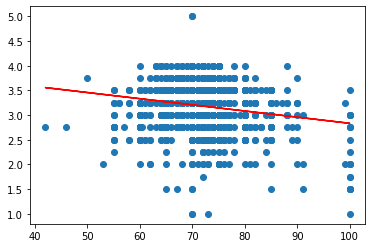

In [57]:
plt.clf()
plt.scatter(df.CocoaPercentage, df.Ratings)
z = np.polyfit(df.CocoaPercentage, df.Ratings, 1)
line_function = np.poly1d(z)
plt.plot(df.CocoaPercentage, line_function(df.CocoaPercentage), "r-")
plt.show()

## Explore!

18. We have explored a couple of the questions about chocolate that inspired us when we looked at this chocolate table.

    What other kinds of questions can you answer here? Try to use a combination of BeautifulSoup and Pandas to explore some more.
    
    For inspiration: Where are the best cocoa beans grown? Which countries produce the highest-rated bars?

In [73]:
#Inspiration: Where are the best cocoa beans grown?

countries = soup.find_all(attrs={"class":"BroadBeanOrigin"})
bean_country_list = []

for country in countries[1:]:
    country_name = country.get_text()
    bean_country_list.append(country_name)
    
df["BroadBeanOrigin"] = country_list


bean_origin = {"BroadBeanOrigin":bean_country_list, "Ratings": ratings}
bean_df = pd.DataFrame.from_dict(bean_origin)


bean_origin_grouped = bean_df.groupby("BroadBeanOrigin").Ratings.mean().nlargest(10)
print(bean_origin_grouped)

BroadBeanOrigin
Dom. Rep., Madagascar           4.00
Gre., PNG, Haw., Haiti, Mad     4.00
Guat., D.R., Peru, Mad., PNG    4.00
Peru, Dom. Rep                  4.00
Ven, Bolivia, D.R.              4.00
Venezuela, Java                 4.00
DR, Ecuador, Peru               3.75
Dominican Rep., Bali            3.75
PNG, Vanuatu, Mad               3.75
Peru, Belize                    3.75
Name: Ratings, dtype: float64


In [79]:
countries = soup.find_all(attrs={"class":"CompanyLocation"})

country_names = []

for country in countries[1:]:
    country_names.append(country.get_text())


highest_rated_bars = pd.DataFrame.from_dict({"Countries":country_names, "Ratings": ratings})

best_bars_country = highest_rated_bars.groupby("Countries").Ratings.mean().nlargest(10)
print(best_bars_country)


Countries
Chile          3.750000
Amsterdam      3.500000
Netherlands    3.500000
Philippines    3.500000
Iceland        3.416667
Vietnam        3.409091
Brazil         3.397059
Poland         3.375000
Australia      3.357143
Guatemala      3.350000
Name: Ratings, dtype: float64
